# Basic Metrics

When we think about summarizing data, what are the metrics that we look at?

We will look at the car dataset

## Data Sources

The idea of the project is to create a small dataset of cars available in India, with the intention to comparing prices, specs, fuel economy etc. across car types. 

- **[SIAM (Society of Indian Automobile Manufacturers)](http://www.siamindia.com/)**: This is the manufacturer government facing association and they do have statistical data on sales and market share of cars by segment and category (though it is paid). They do have one pdf document on fuel economy by car type and engine capacity - [SIAM Fuel Economy Data](http://www.siamindia.com/uploads/filemanager/256th-4W-FE-Data-Declaration.pdf)

- **[ARAI (Automobile Research Association of India)](https://www.araiindia.com/)** - This is the government insitute responsible for providing certification and testing services and I would have expected them to have good database of specs and fuel economy for all the cars. Unfortunately, they don't have any public available data. A website called [ARAI mileage](http://araimileage.in/) seems to have a collected data but in a pdf very similiar to the SIAM format.

- **Car comparison websites** - There are so many car comparison website avaiable - carwale.com, cardekho.com, overdrive.in, cartrade.com, zigwheels.com, auto.ndtv.com but most of them are setup to compare or select 3-4 cars at a time. We actually need a way to scrape the specification data for all the cars. Lets use one of these sites - [Car Zoom](http://carzoom.in/car-specification/) which has good list of specs and price info.

Source- Amit Kapoor

In [ ]:
#Import the required libraries
import numpy as np
import pandas as pd
from datetime import datetime as dt
from scipy import stats

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Read the dataset


In [ ]:
cars = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/hackermath-master/data/cars_v1.csv", encoding = "ISO-8859-1")

### Warm up

In [ ]:
cars.head()


,Make,Model,Price,Type,ABS,BootSpace,GearType,AirBag,Engine,FuelCapacity,Mileage
0,Ashok Leyland Stile,Ashok Leyland Stile LE 8-STR (Diesel),750,MPV,No,500.0,Manual,No,1461.0,50.0,20.7
1,Ashok Leyland Stile,Ashok Leyland Stile LS 8-STR (Diesel),800,MPV,No,500.0,Manual,No,1461.0,50.0,20.7
2,Ashok Leyland Stile,Ashok Leyland Stile LX 8-STR (Diesel),830,MPV,No,500.0,Manual,No,1461.0,50.0,20.7
3,Ashok Leyland Stile,Ashok Leyland Stile LS 7-STR (Diesel),850,MPV,No,500.0,Manual,No,1461.0,50.0,20.7
4,Ashok Leyland Stile,Ashok Leyland Stile LS 7-STR Alloy (Diesel),880,MPV,No,500.0,Manual,No,1461.0,50.0,20.7


**Exercise**

In [ ]:
#Display the first 10 records
cars.head(10)

,Make,Model,Price,Type,ABS,BootSpace,GearType,AirBag,Engine,FuelCapacity,Mileage
0,Ashok Leyland Stile,Ashok Leyland Stile LE 8-STR (Diesel),750,MPV,No,500.0,Manual,No,1461.0,50.0,20.7
1,Ashok Leyland Stile,Ashok Leyland Stile LS 8-STR (Diesel),800,MPV,No,500.0,Manual,No,1461.0,50.0,20.7
2,Ashok Leyland Stile,Ashok Leyland Stile LX 8-STR (Diesel),830,MPV,No,500.0,Manual,No,1461.0,50.0,20.7
3,Ashok Leyland Stile,Ashok Leyland Stile LS 7-STR (Diesel),850,MPV,No,500.0,Manual,No,1461.0,50.0,20.7
4,Ashok Leyland Stile,Ashok Leyland Stile LS 7-STR Alloy (Diesel),880,MPV,No,500.0,Manual,No,1461.0,50.0,20.7
5,Ashok Leyland Stile,Ashok Leyland Stile LX 7-STR (Diesel),900,MPV,No,500.0,Manual,No,1461.0,50.0,20.7
6,Ashok Leyland Stile,Ashok Leyland Stile LX 7-STR Alloy (Diesel),930,MPV,No,500.0,Manual,No,1461.0,50.0,20.7
7,Aston Martin Rapide,Aston Martin Rapide LUXE (Petrol),35000,Sedan,Yes,300.0,Automatic,Yes,5935.0,90.5,7.0
8,Aston Martin Rapide S,Aston Martin Rapide S (Petrol),44000,Sedan,Yes,NaN,Automatic,Yes,5935.0,90.0,11.9
9,Aston Martin V12 Vantage,Aston Martin V12 Vantage Coupe (Petrol),35000,Coupe,Yes,300.0,Automatic,Yes,5935.0,80.0,9.0


In [ ]:
#Display the last 5 records
cars.tail()

,Make,Model,Price,Type,ABS,BootSpace,GearType,AirBag,Engine,FuelCapacity,Mileage
828,Volvo V40,Volvo V40 D3 R-Design (Diesel),2770,Hatchback,Yes,324.0,Automatic,Yes,1984.0,62.0,27.8
829,Volvo V40 Cross Country,Volvo V40 D3 Cross Country (Diesel),3180,Hatchback,Yes,335.0,Automatic,Yes,1984.0,60.0,16.8
830,Volvo V40 Cross Country,Volvo V40 T4 Cross Country (Petrol),3240,Hatchback,Yes,324.0,Automatic,Yes,1596.0,50.0,16.0
831,Volvo XC90,Volvo XC 90 D5 Momentum(Diesel),6490,SUV,Yes,NaN,Automatic,Yes,1969.0,68.0,11.1
832,Volvo XC90,Volvo XC 90 D5 Inscription(Diesel),7790,SUV,Yes,NaN,Automatic,Yes,1969.0,68.0,11.1


In [ ]:
#Find the number of rows and columns in the dataset
cars.shape

(833, 11)

In [ ]:
#What are the column names in the dataset?
cars.columns

Index(['Make', 'Model', 'Price', 'Type', 'ABS', 'BootSpace', 'GearType',
       'AirBag', 'Engine', 'FuelCapacity', 'Mileage'],
      dtype='object')

In [ ]:
#What are the types of those columns ? 
cars.dtypes

Make             object
Model            object
Price             int64
Type             object
ABS              object
BootSpace       float64
GearType         object
AirBag           object
Engine          float64
FuelCapacity    float64
Mileage         float64
dtype: object

In [ ]:
cars.head()

,Make,Model,Price,Type,ABS,BootSpace,GearType,AirBag,Engine,FuelCapacity,Mileage
0,Ashok Leyland Stile,Ashok Leyland Stile LE 8-STR (Diesel),750,MPV,No,500.0,Manual,No,1461.0,50.0,20.7
1,Ashok Leyland Stile,Ashok Leyland Stile LS 8-STR (Diesel),800,MPV,No,500.0,Manual,No,1461.0,50.0,20.7
2,Ashok Leyland Stile,Ashok Leyland Stile LX 8-STR (Diesel),830,MPV,No,500.0,Manual,No,1461.0,50.0,20.7
3,Ashok Leyland Stile,Ashok Leyland Stile LS 7-STR (Diesel),850,MPV,No,500.0,Manual,No,1461.0,50.0,20.7
4,Ashok Leyland Stile,Ashok Leyland Stile LS 7-STR Alloy (Diesel),880,MPV,No,500.0,Manual,No,1461.0,50.0,20.7


In [ ]:
#How to check if there are null values in any of the columns?

#Hint: use the isnull() function  (how about using sum or values/any with it?)
cars.isnull().sum()

Make              0
Model             0
Price             0
Type              0
ABS              16
BootSpace       179
GearType         16
AirBag           21
Engine            7
FuelCapacity      0
Mileage         171
dtype: int64

**How to handle missing values?**

In [ ]:
#fillna function


# Mean, Median, Variance, Standard Deviation

#### Mean

arithmetic average of a range of values or quantities, computed by dividing the total of all values by the number of values.

In [ ]:
#Find mean of price
cars.Price.mean()

3159.4957983193276

In [ ]:
#Find mean of Mileage
cars.Mileage.mean()

17.480407854984882

Let's do something fancier.
Let's find mean mileage of every make. 

*Hint*: need to use `groupby`

In [ ]:
#cars.groupby('Make') : Finish the code
cars.groupby('Make').Mileage.mean().reset_index()

,Make,Mileage
0,Ashok Leyland Stile,20.700000
1,Aston Martin Rapide,7.000000
2,Aston Martin Rapide S,11.900000
3,Aston Martin V12 Vantage,9.000000
4,Aston Martin V8 Vantage,5.000000
...,...,...
198,Volvo S60,19.133333
199,Volvo S80,16.660000
200,Volvo V40,27.800000
201,Volvo V40 Cross Country,16.400000


### Exercise

**How about finding the average mileage for every `Type-GearType` combination?**

,Type,GearType,Mileage
0,Convertible,Automatic,12.147143
1,Coupe,Automatic,9.746071
2,Hatchback,Automatic,19.446111
3,Hatchback,Manual,20.804878
4,Hatchback,No,21.748000
5,MPV,Automatic,20.434286
6,MPV,Manual,18.825862
7,MUV,Automatic,12.466667
8,MUV,Manual,15.634091
9,MUV,No,13.912000


#### Median

Denotes value or quantity lying at the midpoint of a frequency distribution of observed values or quantities, such that there is an equal probability of falling above or below it. Simply put, it is the *middle* value in the list of numbers.

If count is odd, the median is the value at (n+1)/2,

else it is the average of n/2 and (n+1)/2

**Find median of mileage**

In [ ]:
cars.Mileage.median()

17.985

#### Mode

It is the number which appears most often in a set of numbers. 

**Find the mode of `Type` of cars**

In [ ]:
#Let's first find count of each of the car Types
#Hint: use value_counts

In [ ]:
cars.Type.value_counts()

Sedan          294
Hatchback      222
SUV            186
MPV             47
MUV             40
Coupe           33
Convertible     11
Name: Type, dtype: int64

In [ ]:
#Mode of cars

In [ ]:
cars.Type

0              MPV
1              MPV
2              MPV
3              MPV
4              MPV
5              MPV
6              MPV
7            Sedan
8            Sedan
9            Coupe
10           Coupe
11           Coupe
12           Coupe
13           Sedan
14           Sedan
15           Sedan
16           Sedan
17           Sedan
18           Sedan
19     Convertible
20           Sedan
21           Sedan
22           Sedan
23           Sedan
24           Sedan
25           Sedan
26           Sedan
27           Sedan
28           Sedan
29           Sedan
          ...     
803      Hatchback
804      Hatchback
805      Hatchback
806      Hatchback
807      Hatchback
808      Hatchback
809            SUV
810      Hatchback
811          Sedan
812          Sedan
813          Sedan
814          Sedan
815          Sedan
816          Sedan
817          Sedan
818          Sedan
819          Sedan
820          Sedan
821          Sedan
822          Sedan
823          Sedan
824         

In [ ]:
cars.Type.mode()

0    Sedan
dtype: object

In [ ]:
cars.head()

,Make,Model,Price,Type,ABS,BootSpace,GearType,AirBag,Engine,FuelCapacity,Mileage
0,Ashok Leyland Stile,Ashok Leyland Stile LE 8-STR (Diesel),750,MPV,No,500.0,Manual,No,1461.0,50.0,20.7
1,Ashok Leyland Stile,Ashok Leyland Stile LS 8-STR (Diesel),800,MPV,No,500.0,Manual,No,1461.0,50.0,20.7
2,Ashok Leyland Stile,Ashok Leyland Stile LX 8-STR (Diesel),830,MPV,No,500.0,Manual,No,1461.0,50.0,20.7
3,Ashok Leyland Stile,Ashok Leyland Stile LS 7-STR (Diesel),850,MPV,No,500.0,Manual,No,1461.0,50.0,20.7
4,Ashok Leyland Stile,Ashok Leyland Stile LS 7-STR Alloy (Diesel),880,MPV,No,500.0,Manual,No,1461.0,50.0,20.7


#### Variance

> Once two statistician of height 4 feet and 5 feet have to cross a river of AVERAGE depth 3 feet. Meanwhile, a third person comes and said, "what are you waiting for? You can easily cross the river"

It's the average distance of the data values from the *mean*


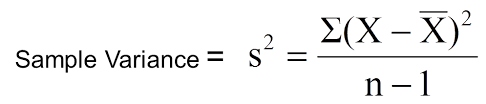

**Find variance of mileage**

In [ ]:
cars.Mileage.var()

21.018811179847432

#### Standard Deviation

It is the square root of variance. This will have the same units as the data and mean. 

**Find standard deviation of mileage**

In [ ]:
cars.Mileage.std()

4.5846277035161132

#### Using Pandas built-in function

In [ ]:
cars.describe()

/Users/amitkaps/miniconda3/lib/python3.5/site-packages/numpy/lib/function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,Price,BootSpace,Engine,FuelCapacity,Mileage
count,833.000000,654.000000,826.000000,833.000000,662.000000
mean,3159.495798,409.536697,1900.533898,51.341693,17.480408
std,6272.519112,175.351525,1065.149758,17.643132,4.584628
min,199.000000,80.000000,624.000000,0.000000,5.000000
25%,619.000000,NaN,NaN,42.000000,NaN
50%,880.000000,NaN,NaN,50.000000,NaN
75%,2329.000000,NaN,NaN,64.000000,NaN
max,50000.000000,1000.000000,6592.000000,120.000000,30.000000


#### Co-variance 

covariance as a measure of the (average) co-variation between two variables, say x and y. Covariance describes both how far the variables are spread out, and the nature of their relationship, Covariance is a measure of how much two variables change together. Compare this to Variance, which is just the range over which one measure (or variable) varies.

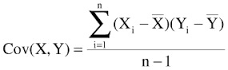

<br>
<br>
<br>
<br>



#### Co-variance of mileage of Automatic and Manual Gear Type

In [ ]:
pd.unique(cars.GearType)

array([' Manual', ' Automatic', nan, ' No'], dtype=object)

In [ ]:
cars_Automatic = cars[cars.GearType==' Automatic'].copy().reset_index()

In [ ]:
cars_Manual = cars[cars.GearType==' Manual'].copy().reset_index()

In [ ]:
cars_Automatic.head()

,index,Make,Model,Price,Type,ABS,BootSpace,GearType,AirBag,Engine,FuelCapacity,Mileage
0,7,Aston Martin Rapide,Aston Martin Rapide LUXE (Petrol),35000,Sedan,Yes,300.0,Automatic,Yes,5935.0,90.5,7.0
1,8,Aston Martin Rapide S,Aston Martin Rapide S (Petrol),44000,Sedan,Yes,NaN,Automatic,Yes,5935.0,90.0,11.9
2,9,Aston Martin V12 Vantage,Aston Martin V12 Vantage Coupe (Petrol),35000,Coupe,Yes,300.0,Automatic,Yes,5935.0,80.0,9.0
3,10,Aston Martin V8 Vantage,Aston Martin V8 Vantage Coupe (Petrol),13500,Coupe,Yes,300.0,Automatic,Yes,4735.0,80.0,5.0
4,11,Aston Martin V8 Vantage,Aston Martin V8 Vantage S Coupe (Petrol),25500,Coupe,Yes,300.0,Automatic,Yes,4735.0,80.0,5.0


In [ ]:
cars_Manual.head()

,index,Make,Model,Price,Type,ABS,BootSpace,GearType,AirBag,Engine,FuelCapacity,Mileage
0,0,Ashok Leyland Stile,Ashok Leyland Stile LE 8-STR (Diesel),750,MPV,No,500.0,Manual,No,1461.0,50.0,20.7
1,1,Ashok Leyland Stile,Ashok Leyland Stile LS 8-STR (Diesel),800,MPV,No,500.0,Manual,No,1461.0,50.0,20.7
2,2,Ashok Leyland Stile,Ashok Leyland Stile LX 8-STR (Diesel),830,MPV,No,500.0,Manual,No,1461.0,50.0,20.7
3,3,Ashok Leyland Stile,Ashok Leyland Stile LS 7-STR (Diesel),850,MPV,No,500.0,Manual,No,1461.0,50.0,20.7
4,4,Ashok Leyland Stile,Ashok Leyland Stile LS 7-STR Alloy (Diesel),880,MPV,No,500.0,Manual,No,1461.0,50.0,20.7


In [ ]:
cars_Manual.shape

(421, 12)

In [ ]:
cars_Automatic.shape

(372, 12)

The number of observations have to be same. For the current exercise, let's take the first 300 observations in both the datasets

In [ ]:
cars_Automatic = cars_Automatic.ix[:299,:]
cars_Manual = cars_Manual.ix[:299,:]

In [ ]:
cars_Automatic.shape

(300, 12)

In [ ]:
cars_Manual.shape

(300, 12)

In [ ]:
cars_manual_automatic = pd.DataFrame([cars_Automatic.Mileage, cars_Manual.Mileage])

In [ ]:
cars_manual_automatic

,0,1,2,3,4,5,6,7,8,9,...,290,291,292,293,294,295,296,297,298,299
Mileage,7.0,11.9,9.0,5.0,5.0,5.0,8.0,16.60,17.0,16.55,...,13.1,13.10,17.2,13.7,17.20,14.80,NaN,NaN,NaN,19.30
Mileage,20.7,20.7,20.7,20.7,20.7,20.7,20.7,17.32,13.7,13.70,...,20.5,20.45,20.5,19.0,19.01,19.01,19.01,13.05,19.87,19.87


In [ ]:
cars_manual_automatic = cars_manual_automatic.T

In [ ]:
cars_manual_automatic.head()

,Mileage,Mileage
0,7.0,20.7
1,11.9,20.7
2,9.0,20.7
3,5.0,20.7
4,5.0,20.7


In [ ]:
cars_manual_automatic.columns = ['Mileage_Automatic', 'Mileage_Manual']

In [ ]:
cars_manual_automatic.head()

,Mileage_Automatic,Mileage_Manual
0,7.0,20.7
1,11.9,20.7
2,9.0,20.7
3,5.0,20.7
4,5.0,20.7


In [ ]:
#Co-variance matrix between the mileages of automatic and manual:
cars_manual_automatic.cov()

,Mileage_Automatic,Mileage_Manual
Mileage_Automatic,22.375515,0.446292
Mileage_Manual,0.446292,12.776373


### Correlation

Extent to which two or more variables fluctuate together. A positive correlation indicates the extent to which those variables increase or decrease in parallel; a negative correlation indicates the extent to which one variable increases as the other decreases.
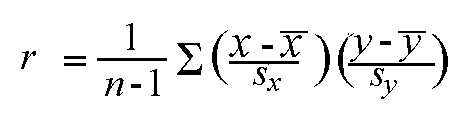

<br>
<br>
<br>



In [ ]:
#### Find the correlation between the mileages of automatic and manual in the above dataset

In [ ]:
cars_manual_automatic.corr()

,Mileage_Automatic,Mileage_Manual
Mileage_Automatic,1.000000,0.026011
Mileage_Manual,0.026011,1.000000


In [ ]:
cars_manual_automatic.corrwith?


# Correlation != Causation

correlation between two variables does not necessarily imply that one causes the other.


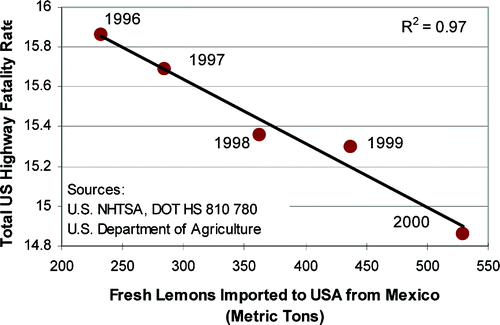